In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style = 'white')
sns.set (style= 'whitegrid', color_codes = True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("Wayfair-Babson_HackathonData 2019.csv")

In [3]:
data.head()

,Purchased,VisitDate,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,State,Gender,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
0,0,7/1/2017,2.014240e+15,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,NY,Female,100to250k,0,0,1,0,0,0,0
1,0,7/1/2017,2.909700e+15,New Visitor,Phone,WebSearch,Safari,iOS,NaN,NaN,NaN,1,0,9,0,230,0,0
2,0,7/1/2017,2.987400e+15,New Visitor,Web,WebSearch,Chrome,Windows,NaN,NaN,NaN,0,0,28,0,10412,0,0
3,0,7/1/2017,6.875970e+15,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,WA,Female,100to250k,1,1,8,1,430,0,0
4,0,7/1/2017,1.153490e+16,New Visitor,Phone,ThirdPartyAds,Safari,iOS,NaN,NaN,NaN,1,1,9,0,1158,0,0


In [4]:
#data.isnull().sum()

In [5]:
# Purchasing rate among all:2.54
round(data['Purchased'].sum()/data.shape[0] * 100,2)

2.54

In [6]:
# Of those Clicked Banner, how many Purchased: 3.4 % ( If they clicked the banner, they are more likely to purchase)
clicked = data[data['ClickedBanner'] == 1]
round(clicked['Purchased'].sum() / clicked.shape[0] * 100, 2)

3.42

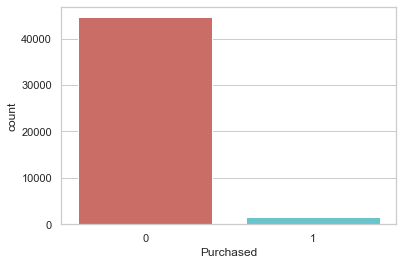

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x = 'Purchased', data =  clicked, palette = 'hls')
plt.show()
plt.savefig('Affect of ClickedBanner')

In [8]:
# Of those not Clicked Banner, how many Purchased: 2.50 %
not_clicked = data[data['ClickedBanner'] != 1]
round(not_clicked['Purchased'].sum() / not_clicked.shape[0] * 100, 2)

2.5

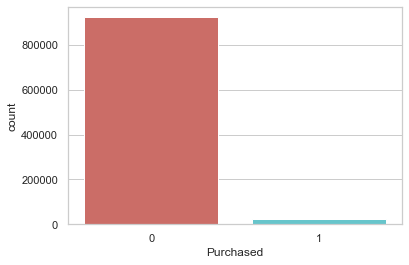

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x = 'Purchased', data =  not_clicked, palette = 'hls')
plt.show()
plt.savefig('Affect of NOT ClickedBanner')

In [10]:
# Build logistic regression to see what affect 

In [11]:
data.columns

Index(['Purchased', 'VisitDate', 'UniqueVisitID', 'VisitorGroup',
       'PlatformUsed', 'VisitSource', 'BrowserName', 'OSName', 'State',
       'Gender', 'IncomeRange', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'AddedToBasket'],
      dtype='object')

In [12]:
category_vars = ['VisitDate', 'VisitorGroup', 'PlatformUsed', 'Gender', 'VisitSource', 'BrowserName', 'OSName', 'State', 'IncomeRange']

In [13]:
data = pd.get_dummies(data, columns = category_vars, drop_first = True)

In [14]:
X = data.loc[:,data.columns != 'Purchased'].values
y = data.iloc[:, -1].values
X, y

(array([[2014240000000000.0, '100to250k', 0, ..., 0, 0, 0],
        [2909700000000000.0, nan, 1, ..., 0, 0, 0],
        [2987400000000000.0, nan, 0, ..., 0, 0, 0],
        ...,
        [9.20928e+18, nan, 0, ..., 0, 0, 0],
        [9.21368e+18, '100to250k', 1, ..., 0, 0, 0],
        [9.21909e+18, nan, 1, ..., 0, 0, 0]], dtype=object),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

In [15]:
data.head()

,Purchased,UniqueVisitID,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,...,State_VA,State_VI,State_VIC,State_VT,State_WA,State_WAT,State_WI,State_WV,State_WY,State_YT
0,0,2.014240e+15,100to250k,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2.909700e+15,NaN,1,0,9,0,230,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.987400e+15,NaN,0,0,28,0,10412,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,6.875970e+15,100to250k,1,1,8,1,430,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1.153490e+16,NaN,1,1,9,0,1158,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)

In [17]:
log_reg = LogisticRegression()

In [18]:
log_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'Under50k'

In [ ]:
y_predict = log_reg.predict(X_test)

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

In [ ]:
print(classification_report(y_test, y_predict))